# Wine Quality Classification

**In this module we will classify wine bottles into 3 grade classes according to their quality**

In [1]:
# Importing computational packages
import numpy as np
import pandas as pd

# Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the datasets
path = 'C:\\Users\\Pranay Singhal\\Desktop\\college project\\redwine.csv'
dataset = pd.read_csv(path)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
Grade                   1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,B
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,B
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,B


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Checking for the missing value present in each columns
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Grade,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
dataset["Grade"].value_counts()

B    1319
A     217
C      63
Name: Grade, dtype: int64

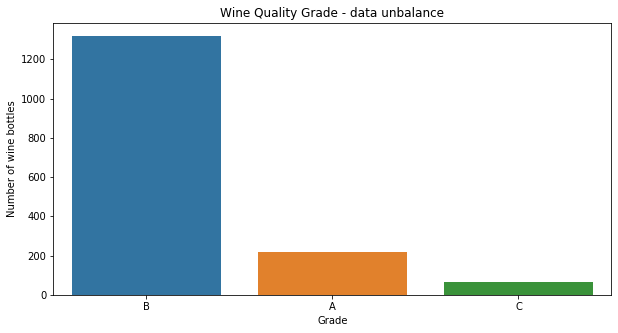

In [10]:
# Visualization of training data

# Individual Plots - a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))
sns.countplot(dataset["Grade"])
plt.ylabel("Number of wine bottles")
plt.xlabel("Grade")
plt.title("Wine Quality Grade - data unbalance")
plt.show()

In [11]:
#Observe the distribution of our classes
classes=dataset['Grade'].value_counts()
grade_A = round(classes[0] / dataset['Grade'].count()*100,2)
grade_B = round(classes[1] / dataset['Grade'].count()*100, 2)
grade_C = round(classes[2] / dataset['Grade'].count()*100, 2)
grade_A, grade_B, grade_C

(82.49, 13.57, 3.94)

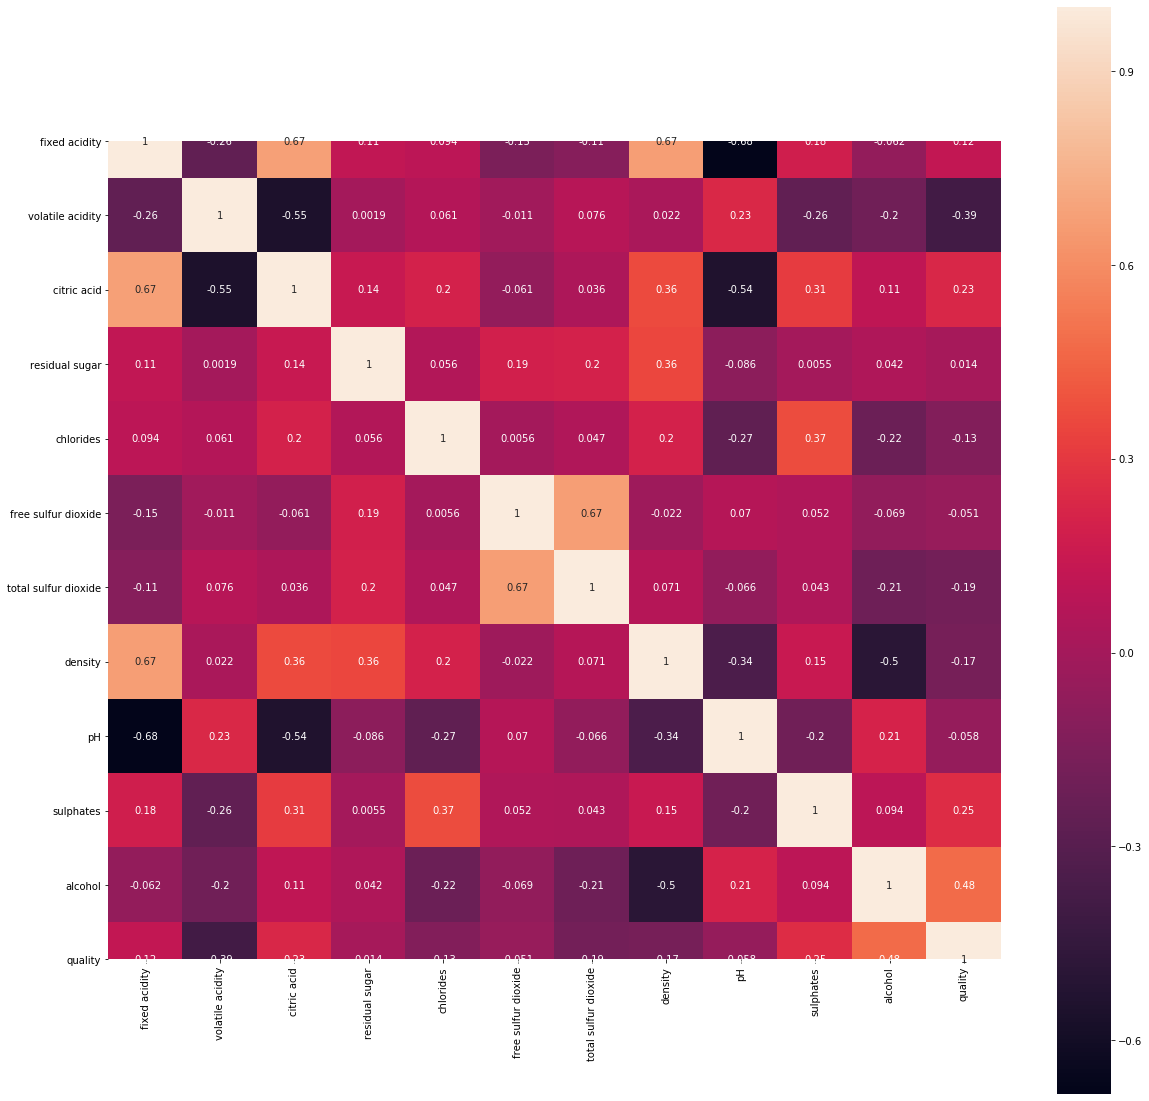

In [20]:
# Heatmap 
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 20))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=None, square=True, ax=ax,annot=True)
plt.show()

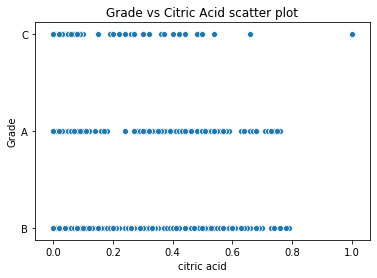

In [21]:
# Create a scatter plot to observe the distribution of classes with citric acid
sns.scatterplot(dataset["citric acid"], dataset["Grade"])
plt.title("Grade vs Citric Acid scatter plot")
plt.show()

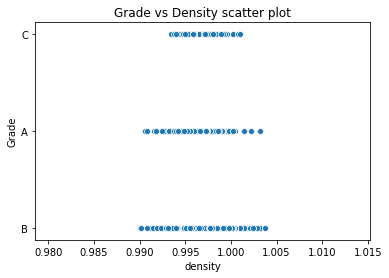

In [22]:
# Create a scatter plot to observe the distribution of classes with citric acid
sns.scatterplot(dataset["density"], dataset["Grade"])
plt.title("Grade vs Density scatter plot")
plt.show()